# CogSci 138 Lab 1

In this lab we will look at the classic Ebbinghaus illusion, in which two line segments are presented and the observer is asked to indicate which is longer (the top line or the bottom line)? Because the lines have arrow heads at each side, sometimes the apparent length is illusory. You can learn more about this illusion here: https://www.illusionsindex.org/i/mueller-lyer 

In this lab you will learn:
1. What is the Ebbinghaus illusion?
2. What parameters control the illusion's strength?
3. How to measure it using the Method of Adjustment
4. How to measure it using the Method of Constant Stimuli
5. How to estimate the Point of Subjective Equality (PSE) and Just Noticeable Difference (JND)
6. How PSE and JND vary as a function of illusion strength

## 0. Set up packages
Pyllusion is a lightweight and useful package for rendering classic optical illusions. Learn about the available illusions here: https://github.com/RealityBending/Pyllusion

In [ ]:
!pip install pyllusion

In [1]:
# imports
import time
from IPython.display import display, clear_output
import pandas as pd
from pyllusion import Ebbinghaus
from ipywidgets import IntSlider, FloatSlider, VBox, Output, Button
import matplotlib.pyplot as plt
import random

## 1. Use Method of Adjustment to control the Ebbinghaus illusion
In Pyllusion's implementation of the Ebbinghaus illusion there are two main parameters that will affect if you perceive it:
1. difference (The objective size difference of the inner circles)
2. illusion_strength (The strength of the surrounding context, i.e. outer circles, in biasing perception of unequally sized inner circles)

In the next example you will see what it means to vary the illusion strength, while keeping the difference between the upper and bottom lines at zero. Even though the red circles are always the same size, do you see that sometimes the left and right red circles appear to be different sizes, especially when the illusion strength is high?

In [4]:
stimulus?

Type:           Ebbinghaus
String form:    <pyllusion.Ebbinghaus.Ebbinghaus.Ebbinghaus object at 0x7d34b919e6d0>
File:           /srv/conda/lib/python3.11/site-packages/pyllusion/Ebbinghaus/Ebbinghaus.py
Docstring:     
A class to generate the Ebbinghaus Illusion.

The Ebbinghaus illusion is an optical illusion of relative size perception,
where circles of identical size appear as different because of their surrounding context.
Specifically, the central circle that is surrounded by large circles appears smaller
than the central circle surrounded by small circles.

Each instance of `Ebbinghaus` contains attributes corresponding to the parameters of the illusion.

Parameters
----------
illusion_strength : float
    The strength of the surrounding context, i.e. outer circles, in biasing perception of unequally sized inner circles.
    Specifically, the size of the outer circle relative to the inner circle (in percentage, e.g, if `illusion_strength=1`,
    it means that the outer circle wi

Ebbinghaus illusion with 5 different illusion strengths


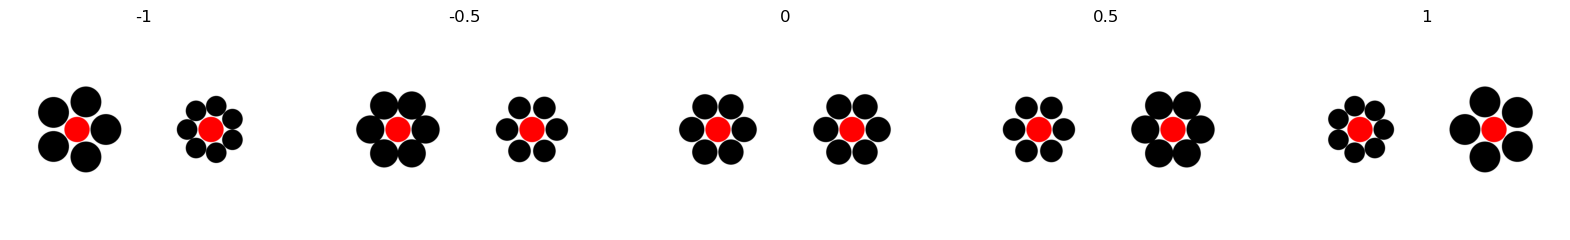

In [11]:
ILLUSION_STRENGTH = [-1,-0.5,0,0.5,1]
SIZE_MIN = 0.25
plt.figure(figsize=(20,5))
for i,illusion_strength in enumerate(ILLUSION_STRENGTH, start=1): 
    plt.subplot(1,len(ILLUSION_STRENGTH),i)
    stimulus = Ebbinghaus(illusion_strength=illusion_strength, size_min=SIZE_MIN, difference=0)    
    img = stimulus.to_image();
    plt.imshow(img)
    plt.axis('off')
    plt.title(illusion_strength)
print(f"Ebbinghaus illusion with {len(ILLUSION_STRENGTH)} different illusion strengths") 

In the next example you will see what it means to vary the difference between the inner circles, while keeping the illusion strength fixed at 0. When the illusion strength is zero, the illusion doesn't usually occur: You should be able to accurately tell which circle is bigger. 

Ebbinghaus illusion with illusion strength of 0 and 5 different relative sizes


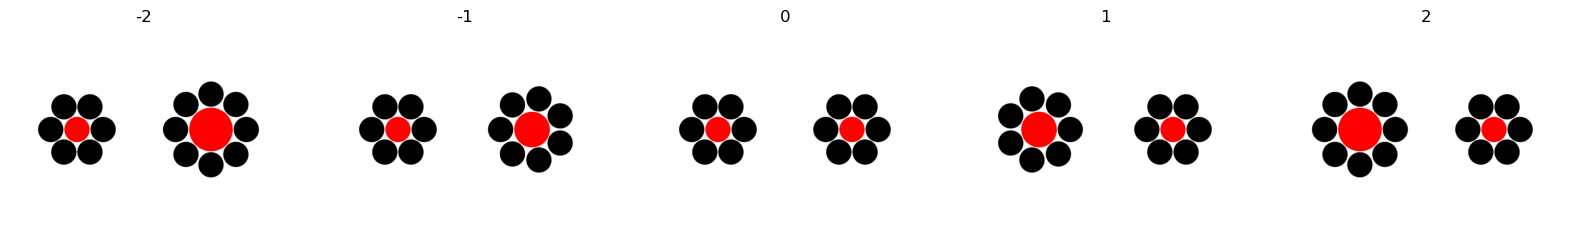

In [14]:
ILLUSION_STRENGTH = 0
DIFFERENCES = [-2, -1, 0, 1, 2]
plt.figure(figsize=(20,5))
for i,delta in enumerate(DIFFERENCES, start=1): 
    plt.subplot(1,len(DIFFERENCES),i)
    stimulus = Ebbinghaus(illusion_strength=ILLUSION_STRENGTH, size_min=SIZE_MIN, difference=delta)    
    img = stimulus.to_image();
    plt.imshow(img)
    plt.axis('off')
    plt.title(delta)
print(f"Ebbinghaus illusion with illusion strength of 0 and {len(DIFFERENCES)} different relative sizes")

Ebbinghaus illusion with various arrow angles and and relative lengths. Any apparent length difference in column 3 is illusory, as is perceiving the same line length in columns 1,2,4 or 5.


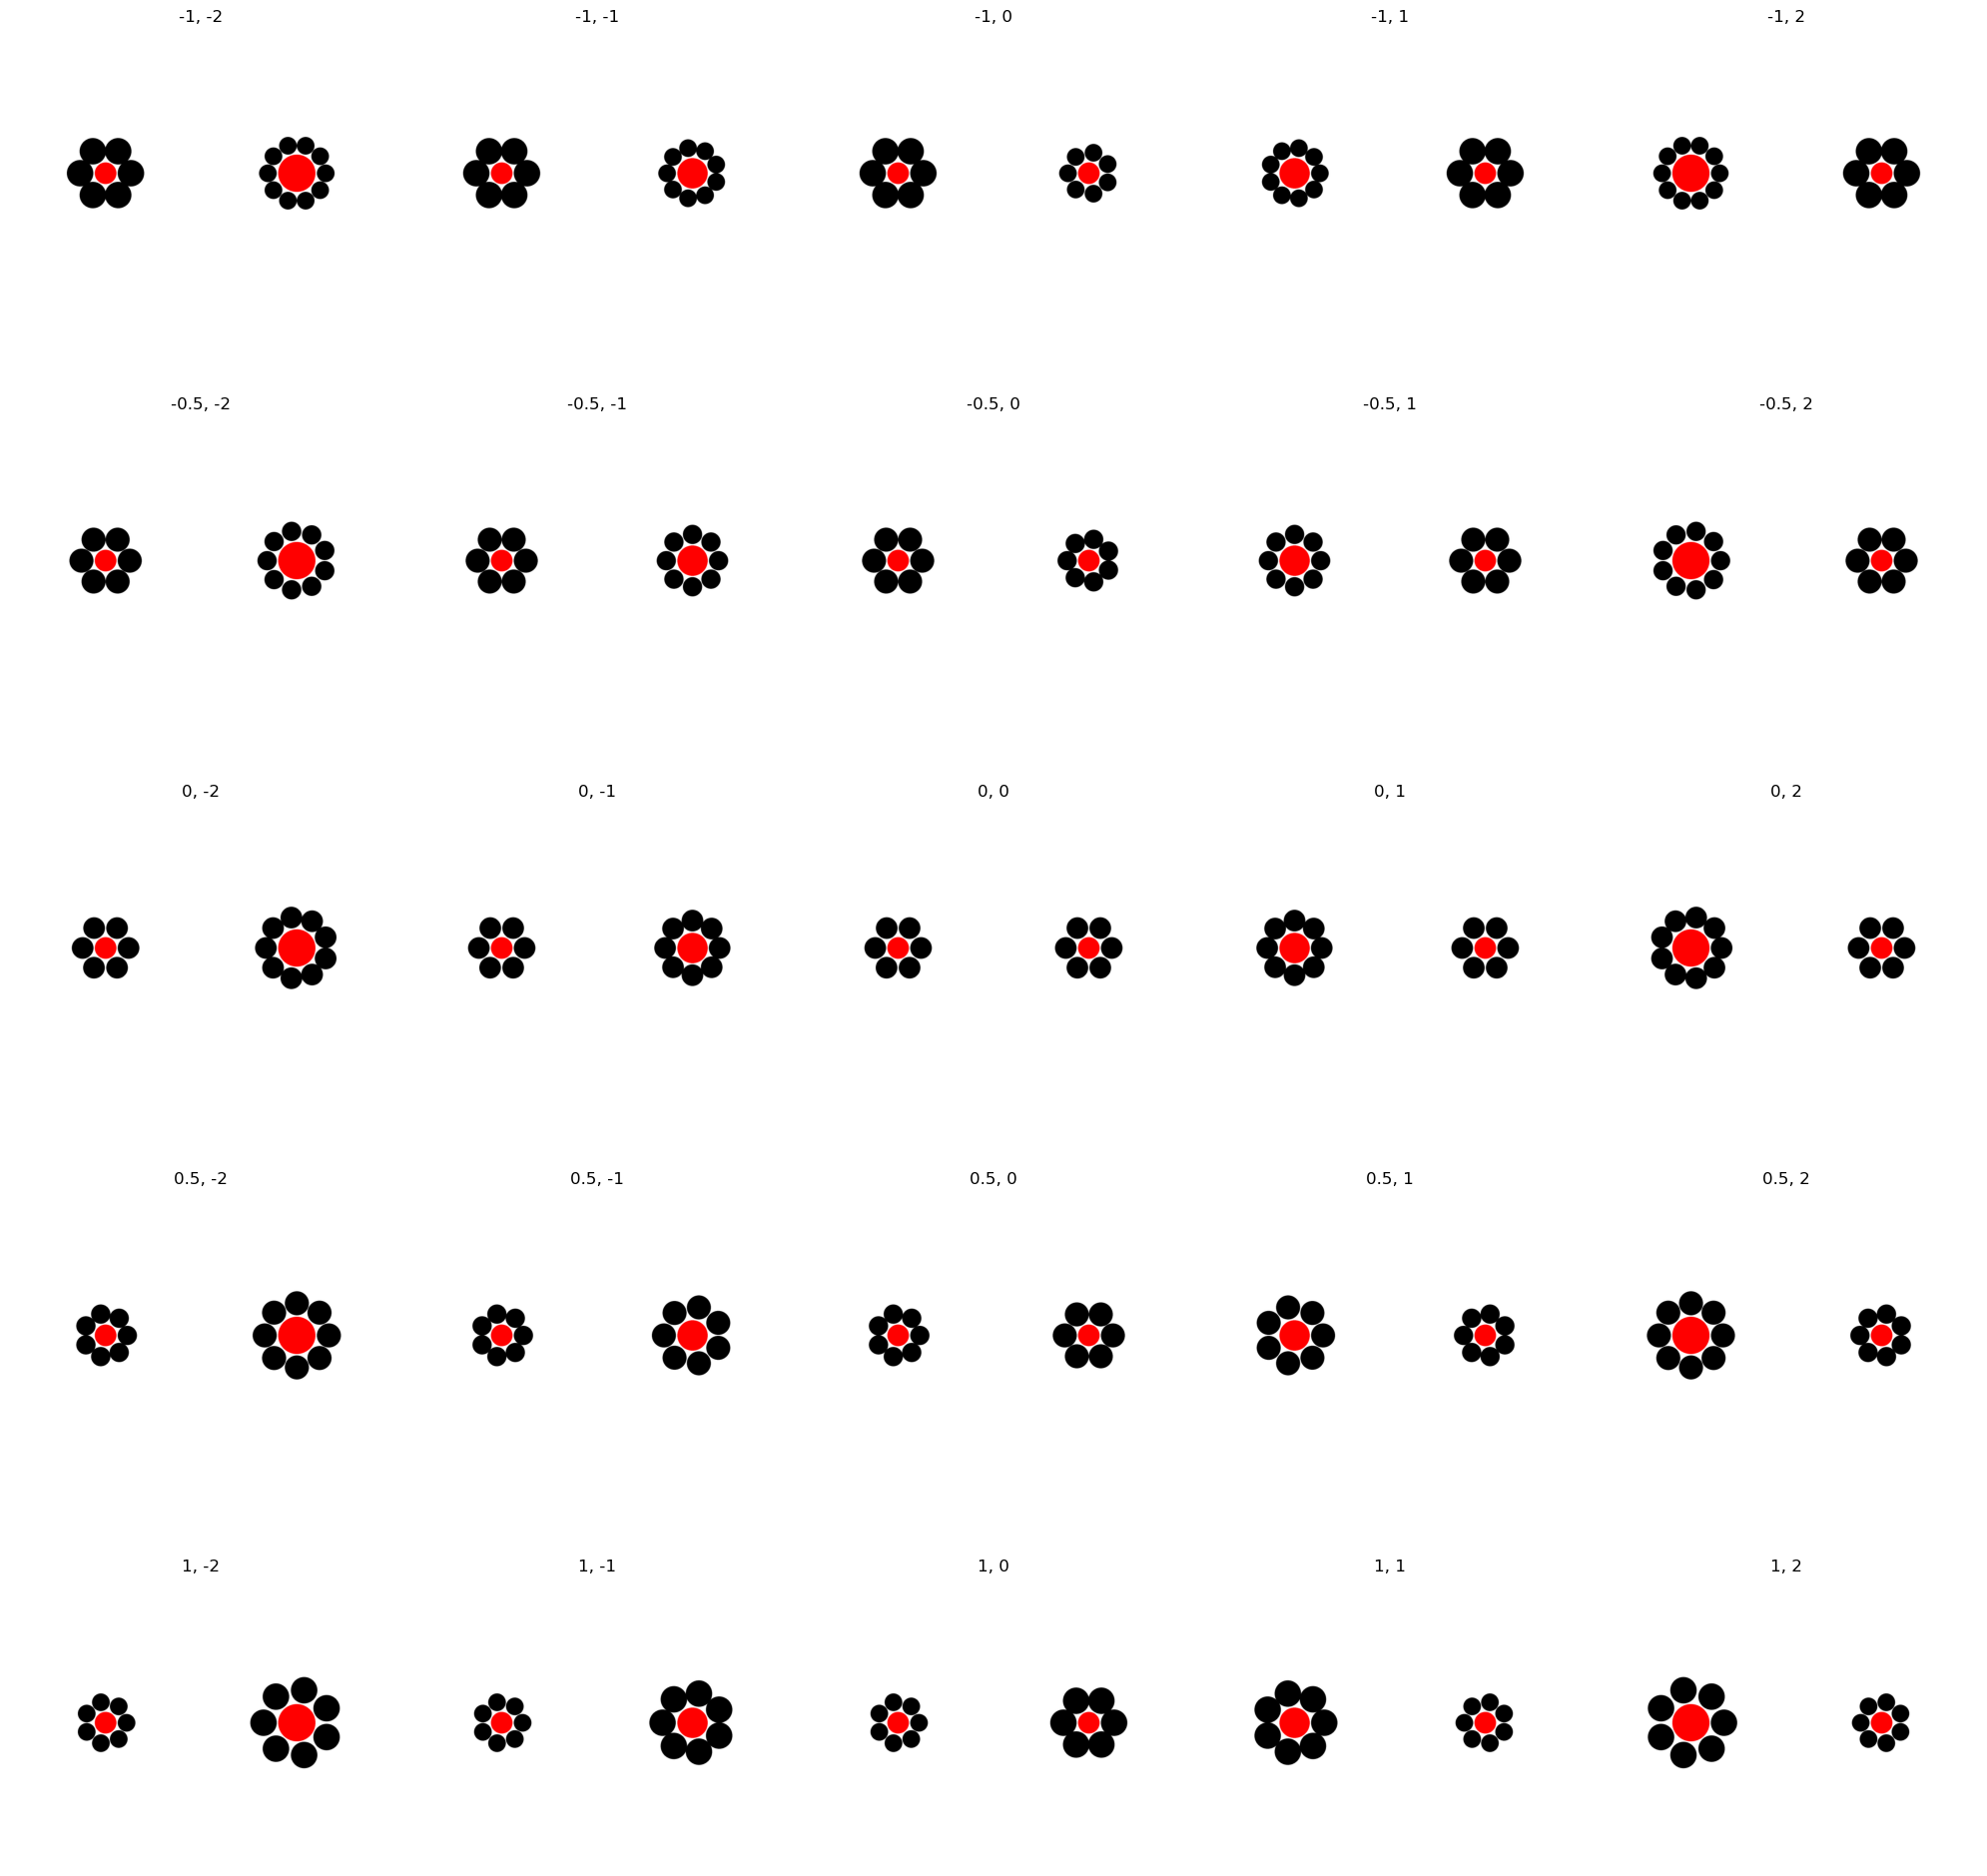

In [16]:
ILLUSION_STRENGTH = [-1,-0.5,0,0.5,1]
DIFFERENCES = [-2, -1, 0, 1, 2]
SIZE_MIN = 0.15
plt.figure(figsize=(20,20))
for i,illusion_strength in enumerate(ILLUSION_STRENGTH, start=0): 
    for j,delta in enumerate(DIFFERENCES, start=1): 
        plt.subplot(len(DIFFERENCES),len(ILLUSION_STRENGTH),i*len(ILLUSION_STRENGTH)+j)
        stimulus = Ebbinghaus(illusion_strength=illusion_strength, size_min=SIZE_MIN, difference=delta)    
        img = stimulus.to_image();
        plt.imshow(img)
        plt.axis('off')
        plt.title(str(illusion_strength) + ", " + str(delta))
plt.tight_layout()
print(f"Ebbinghaus illusion with various arrow angles and and relative lengths. Any apparent length difference in column 3 is illusory, as is perceiving the same line length in columns 1,2,4 or 5.")

## 2. Method of Adjustment
Now that you know the scope of this stimulus, let's quantify your perception of this illusion using the simplest of quantitative measurement techniques: the method of adjustment. The slider will adjust the relative line length. It may react a bit slowly so be patient. We will measure the Point of Subjective Equality (PSE) which in this case is line difference when you perceive the upper and lower lines to be the same. We will measure the PSE for three different arrow angles and then see if the arrow angle really does affect how strongly you perceive the illusion.

In [17]:
def Ebbinghaus_adjustment_expt(ILLUSION_STRENGTH = 30, STANDARD_LENGTH = 0.5):

    # Define update function that redraws the image
    def update_image(change):
        delta = change['new']
        illusion = Ebbinghaus(
            illusion_strength=ILLUSION_STRENGTH,
            size_min=STANDARD_LENGTH,
            difference=delta
        )
        img = illusion.to_image()
    
        with output:
            output.clear_output(wait=True)
            plt.figure(figsize=(6, 2))
            plt.imshow(img)
            plt.axis('off')
            plt.show()
    
    # Submit button handler
    def on_submit_clicked(b):
        adjustment_results['ratio'] = illusion_slider.value
        adjustment_results['length_standard'] = STANDARD_LENGTH 
        adjustment_results['length_comparison'] = STANDARD_LENGTH + STANDARD_LENGTH*adjustment_results['ratio']
        adjustment_results['PSE'] = adjustment_results['length_standard'] - adjustment_results['length_comparison']
        with output:
            print(f"The standard line (arrows pointing out) has a length of {adjustment_results['length_standard']}")
            print(f"To perceive the comparison line (arrows pointing in) as the same length as the standard, you adjusted its length to be {adjustment_results['length_comparison']}")
            print(f"This means that when the arrow angle is {ILLUSION_STRENGTH} deg, your Point of Subjective Equality (PSE) is {adjustment_results['PSE']:.2f}")
            
        illusion_slider.disabled = True # disable further interaction
        submit_button.disabled = True # disable further interaction
        return adjustment_results
        
    print("Adjust the slider until the top and bottom lines are perceived to be equal (be patient, it may be slow to respond).") 
    print("When you are done, hit Submit to see you results.")
    output = Output() # Set up the output area for the image
    illusion_slider = FloatSlider(value=random.uniform(0., 1.), readout=False, # Create the slider to adjust line length difference
        min=0.0, max=1.0, step=0.05, description="length:",continuous_update=True)
    submit_button = Button(description="Submit", button_style="success") # Submit button
    adjustment_results = {}  # to store submission result
  
    # Attach event handlers & display
    illusion_slider.observe(update_image, names='value')
    submit_button.on_click(on_submit_clicked)
    update_image({'new': illusion_slider.value}) # Trigger initial draw manually
    display(VBox([illusion_slider, output, submit_button]))
    return adjustment_results


In [19]:
# set up a dataframe for the adjustment results
adjustment_results_df = pd.DataFrame(columns=['arrow_angle', 'PSE'])
ILLUSION_STRENGTHS = [2,1,0]
i = 0
# measure first arrow angle
adjustment_results = Ebbinghaus_adjustment_expt(ILLUSION_STRENGTH = ILLUSION_STRENGTHS[i], STANDARD_LENGTH = 0.25)

Adjust the slider until the top and bottom lines are perceived to be equal (be patient, it may be slow to respond).
When you are done, hit Submit to see you results.


In [ ]:
# record PSE for first arrow angle
adjustment_results_df.loc[len(adjustment_results_df)] = [ILLUSION_STRENGTHS[i], adjustment_results['PSE']]

In [ ]:
# measure second arrow angle
i += 1
adjustment_results = Ebbinghaus_adjustment_expt(ILLUSION_STRENGTH = ILLUSION_STRENGTHS[i], STANDARD_LENGTH = 0.5)

In [ ]:
# record PSE for second arrow angle
adjustment_results_df.loc[len(adjustment_results_df)] = [ILLUSION_STRENGTHS[i], adjustment_results['PSE']]

In [ ]:
# measure third arrow angle
i += 1
adjustment_results = Ebbinghaus_adjustment_expt(ILLUSION_STRENGTH = ILLUSION_STRENGTHS[i], STANDARD_LENGTH = 0.5)

In [ ]:
# record PSE for third arrow angle
adjustment_results_df.loc[len(adjustment_results_df)] = [ILLUSION_STRENGTHS[i], adjustment_results['PSE']]

In [ ]:
# plot summary of your results for three arrow angles
adjustment_results_df.plot('arrow_angle','PSE')
plt.xlabel('arrow angle (deg)')
plt.ylabel('extra comparison length needed\n to be perceived as same as standard')
plt.title('Method of Adjustment: Ebbinghaus Illusion')

## 3. Method of Constant Stimuli

The Method of Adjustment is fast, easy and intuitive. However did you notice any potential issues with it? <describe issues> 
Next we will try to quantify your perception of the Ebbinghaus illusion using a more robust and controlled quantitative measurement technique: the method of constant stimuli. Instead of a slider, you will simply see the illusion and hit the up or down arrow.


In [ ]:
def Ebbinghaus_constantstim_expt(illusion_strength=30, num_trials_per_level=2, size_min=0.5, STIMULUS_DURATION=1.0):

    # expt parameters & set up
    DELTAS = [-1,-0.5,0,0.5,1] * num_trials_per_level
    constantstimuli_results_df = pd.DataFrame(columns=['trial','illusion_strength','difference','response','RT']) # prepare results container
    plt.figure()
    try:
        fixation_cross = Image.open("./fixation_cross.jpg")
    except FileNotFoundError:
        print("Error: Fixation cross file not found.")
    
    # run the experiment loop
    for i, delta in enumerate(DELTAS, start=1):
        # 1) generate the PIL image for this trial and show it
        ml = MullerLyer(illusion_strength=illusion_strength, size_min=size_min, difference=delta)
        pil_img = ml.to_image()   # assume .to_pil(size) returns a PIL.Image
        clear_output(wait=True)
        t0 = time.time()
        display(pil_img)
        
        # 2) wait a standard amount of time then clear the image
        time.sleep(STIMULUS_DURATION)
        clear_output(wait=True)
        display(fixation_cross)
        
        # 3) collect response via keyboard input & record
        while True:
            resp = input(f"Trial {i}/{len(DELTAS)} — which line looked longer? Top (1) or Bottom (2)?: ").strip()
            if resp in ['1', '2']:
                break
            print("Invalid input. Please type '1' or '2'.")
            
        rt = time.time() - t0
        constantstimuli_results_df.loc[len(constantstimuli_results_df)] = [i, illusion_strength, delta, resp, rt]
    
    clear_output()
    return constantstimuli_results_df

In [ ]:
constantstimuli_results_df = Ebbinghaus_constantstim_expt()